In [30]:
library('igraph')
library('Matrix')
library('pracma')


### Transition Matrix for a Directed Network

In [4]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### random_walk func

In [5]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [22]:
z = matrix(nrow=2,ncol=3,c(1,2,3,4,5,6) ) 
print(z)
print(colMeans(z, na.rm = FALSE, dims = 1))
print(apply(z, 2, sum)/2)

print(sd(c(1, 2)))

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
[1] 1.5 3.5 5.5
[1] 1.5 3.5 5.5
[1] 0.7071068


In [103]:
l=c()
for(i in 1:5)
l <- append(l, i)
print (l)

[1] 1 2 3 4 5


### random walk matrix

In [13]:
random_walk_matrix = function (g , mt){
    transition_matrix = create_transition_matrix(g)
    steps = ncol(mt)
    samples = nrow(mt)
    set.seed(1)
    for( row in 1:samples){
        v = sample(1:vcount(g), 1)
        temp=v
        
        for(i in 1:steps){
            # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
            mt[row,i]= shortest.paths(g, temp,v)
        }
    }
    return(mt)
}

### random walk degree

In [12]:
random_walk_degree = function (g,steps,times){
    transition_matrix = create_transition_matrix(g)

    set.seed(1)
    degree = c()
    for( row in 1:times){
        v = sample(1:vcount(g), 1)
        
        for(i in 1:steps){
            # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
            
        }
        degree <- append(degree,  degree(g, v))
    }
    return(degree)
}

In [33]:
problem2 = function (N){
 size = N
g1 <- barabasi.game(size, m=1, directed=F)

#print(a[1,])
numOfSamples = 200
steps = 300#as.integer(log(size, base = exp(1)))+60 # 30 is some unnecessary extra steps

result = matrix(nrow=numOfSamples,ncol=steps)  
dist = random_walk_matrix(g1,result)
mean = colMeans(dist, na.rm = FALSE, dims = 1)
std = apply(dist, 2, sd)
layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
plot(std, main="the std of the distance vs step",xlab="step",ylab="std")
deg = random_walk_degree(g1,steps,1000)
hist(deg)
hist(degree(g1))   
    }

### node = 1000

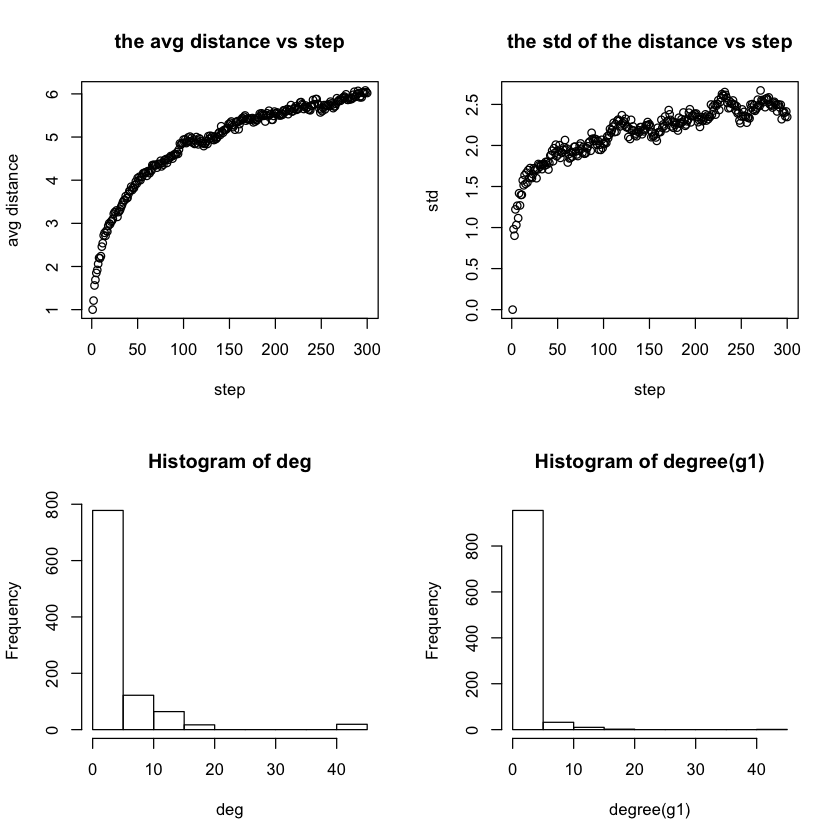

In [34]:
problem2(1000)

### node = 100

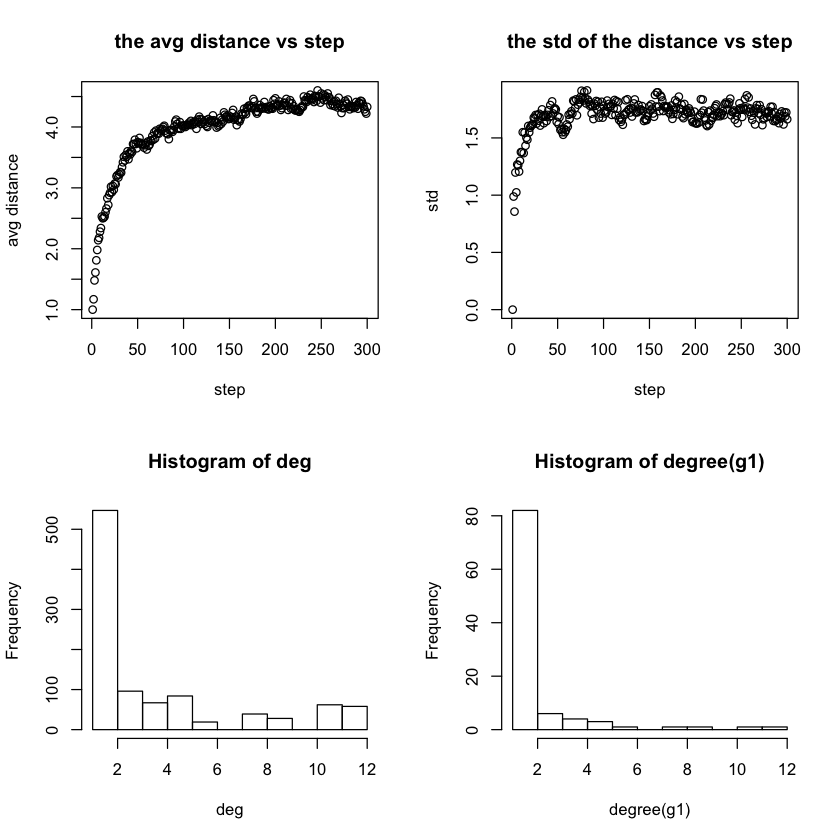

In [35]:
problem2(100)

### node = 10000

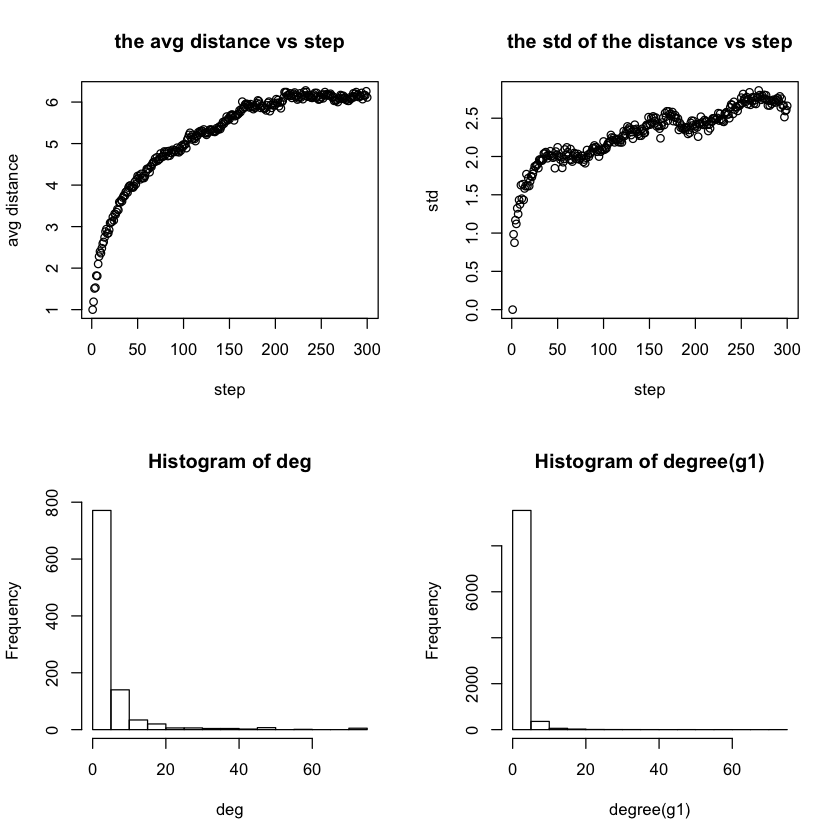

In [36]:
problem2(10000)

In [38]:
a100=barabasi.game(100, m=1, directed=F)
is.connected(a100)
print(mean_distance(a100, directed = F, unconnected = FALSE))
a1000=barabasi.game(1000, m=1, directed=F)
is.connected(a1000)
print(mean_distance(a1000, directed = F, unconnected = FALSE))
a10000=barabasi.game(10000, m=1, directed=F)
is.connected(a10000)
print(mean_distance(a10000, directed = F, unconnected = FALSE))

[1] TRUE

[1] 4.929697


[1] TRUE

[1] 7.907499


[1] TRUE

[1] 11.87597
